### Support vector machine Matychenko Anastasiia

Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer, make_blobs

Split data

In [2]:
X,y=make_blobs(centers=4, random_state=10)

Train and predict with linear SVG

In [3]:
X_new = np.hstack([X, X[:, 1:] ** 2])
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Results

In [4]:
score_1=linear_svm_3d.score(X_new,y)
print("Для лійніної машини",score_1)

Для лійніної машини 1.0


Plot graphics

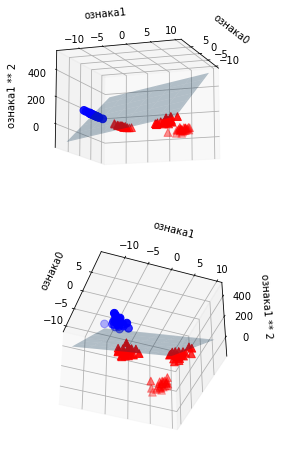

In [5]:
figure=fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.view_init(elev=-11, azim=20)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY+intercept[0])/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("ознака0")
ax.set_ylabel("ознака1")
ax.set_zlabel("ознака1 ** 2")
ax = fig.add_subplot(2, 1, 2,projection='3d')
ax.view_init(elev=-40, azim=-20)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2)
XX, YY = np.meshgrid(xx, yy)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("ознака0")
ax.set_ylabel("ознака1")
ax.set_zlabel("ознака1 ** 2")
plt.show()

### Non-Linear SVG

Load Libraries

In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression


The size of the test sample varies from 0.05 to 0.5 with a margin of 0.05.

In [7]:
change_bounds=np.arange(0.05,0.51,0.05,dtype=float)
size_errors=[]

Load data

In [8]:
#Task 4
data=load_breast_cancer()
X, y = data.data, data.target

Normalisation and train

In [9]:
X = StandardScaler().fit_transform(X)

Plot results with different hypoparametrs 

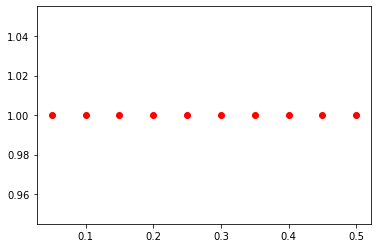

In [10]:
for i in change_bounds:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=10)
    svm = SVC (kernel = 'rbf', C = 10, gamma = 0.1). fit (X_train, y_train)
    y_pred=svm.predict(X_test)
    train_score=svm.score(X_train,y_train)
    size_errors.append([i,train_score.sum()])
    plt.scatter(i,train_score,c='r')
size_errors=np.array(size_errors)

Error with differnt hypopaparameters for test size

No handles with labels found to put in legend.


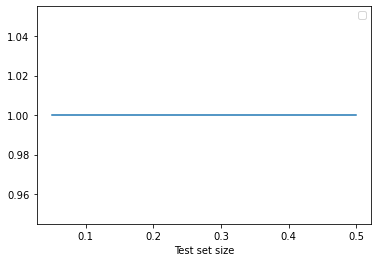

In [11]:
x_Err=np.array([[size_errors[i,0]] for i in range(len(size_errors))])
poly=PolynomialFeatures(3).fit_transform(size_errors[:,0].reshape(-1,1))
poly_reg_model=LinearRegression().fit(poly,size_errors[:,1])
plt.plot(size_errors[:,0],poly_reg_model.predict(poly))
plt.xlabel('Test set size')
plt.legend()
plt.show()

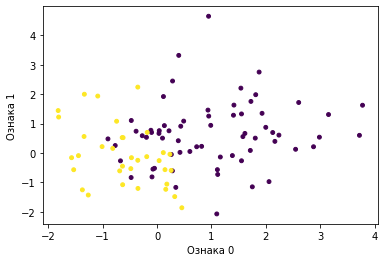

In [12]:
# розміщуємо на графіку опорні вектори
sv = svm.support_vectors_
# Мітки класів опорних векторів визначаються знаком дуальних коефіцієнтів
sv_labels = svm.dual_coef_.ravel() > 0
plt.scatter(sv[0:100, 0], sv[0:100, 1], c=sv_labels[0:100], s=15)
#plt.scatter(sv[:, 0], sv[:, 1], c=sv_labels, s=15)
plt.xlabel("Ознака 0")
plt.ylabel("Ознака 1")
plt.show()

Results

In [13]:
score_2=svm.score(X_train,y_train)
print("Для нелійніної машини",score_2)

Для нелійніної машини 1.0
